# ENV / ATM 415: Climate Laboratory

# The planetary energy budget in CESM simulations

### Tuesday April 19 and Thursday April 21, 2016

_____________________________________

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc

/Users/Brian/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Open the output from our control simulation with the slab ocean version of the CESM:

In [2]:
##  To read data over the internet
control_filename = 'som_1850_f19.cam.h0.clim.nc'
datapath = 'http://ramadda.atmos.albany.edu:8080/repository/opendap/latest/Top/Users/Brian+Rose/CESM+runs/'
endstr = '/entry.das'
control = nc.Dataset( datapath + 'som_1850_f19/' + control_filename + endstr )

##  To read from a local copy of the file 
## (just a small subset of the total list of variables, to save disk space)
#ontrol_filename = 'som_1850_f19.cam.h0.clim_subset.nc'
#control = nc.Dataset( control_filename )

The full file from the online server contains many many variables, describing all aspects of the model climatology.

Whether we see a long list or a short list in the following code block depends on whether we are reading the full output file or the much smaller subset:

In [3]:
for v in control.variables: print v

lev
hyam
hybm
ilev
hyai
hybi
P0
time
date
datesec
lat
lon
slat
slon
w_stag
time_bnds
date_written
time_written
ntrm
ntrn
ntrk
ndbase
nsbase
nbdate
nbsec
mdt
nlon
wnummax
gw
ndcur
nscur
co2vmr
ch4vmr
n2ovmr
f11vmr
f12vmr
sol_tsi
nsteph
AEROD_v
CLDHGH
CLDICE
CLDLIQ
CLDLOW
CLDMED
CLDTOT
CLOUD
CONCLD
DCQ
DTCOND
DTV
EMIS
FICE
FLDS
FLDSC
FLNS
FLNSC
FLNT
FLNTC
FLUT
FLUTC
FSDS
FSDSC
FSDTOA
FSNS
FSNSC
FSNT
FSNTC
FSNTOA
FSNTOAC
FSUTOA
ICEFRAC
ICIMR
ICWMR
LANDFRAC
LHFLX
LWCF
MSKtem
OCNFRAC
OMEGA
OMEGAT
PBLH
PHIS
PRECC
PRECL
PRECSC
PRECSL
PS
PSL
Q
QFLX
QREFHT
QRL
QRS
RELHUM
SFCLDICE
SFCLDLIQ
SHFLX
SNOWHICE
SNOWHLND
SOLIN
SWCF
T
TAUX
TAUY
TGCLDCWP
TGCLDIWP
TGCLDLWP
TH
TH2d
TMQ
TREFHT
TS
TSMN
TSMX
U
U10
U2d
UTGWORO
UU
UV2d
UV3d
UW2d
UW3d
V
V2d
VD01
VQ
VT
VTH2d
VTH3d
VU
VV
W2d
WTH3d
Z3


Today we need just a few of these variables:

- `TS`: the surface temperature
- `FLNT`: the longwave radiation at the top of the atmosphere (i.e. what we call the OLR)
- `FSNT`: the net shortwave radiation at the top of the atmosphere (i.e. what we call the ASR)
- `FLNTC`: the clear-sky OLR
- `FSNTC`: the clear-sky ASR

Take a look at some of the meta-data for these fields:

In [4]:
for field in ['TS', 'FLNT', 'FSNT', 'FLNTC', 'FSNTC']:
    print control.variables[field]

<type 'netCDF4._netCDF4.Variable'>
float32 TS(time, lat, lon)
    units: K
    long_name: Surface temperature (radiative)
    cell_methods: time: mean time: mean
unlimited dimensions: time
current shape = (12, 96, 144)
filling off

<type 'netCDF4._netCDF4.Variable'>
float32 FLNT(time, lat, lon)
    Sampling_Sequence: rad_lwsw
    units: W/m2
    long_name: Net longwave flux at top of model
    cell_methods: time: mean time: mean
unlimited dimensions: time
current shape = (12, 96, 144)
filling off

<type 'netCDF4._netCDF4.Variable'>
float32 FSNT(time, lat, lon)
    Sampling_Sequence: rad_lwsw
    units: W/m2
    long_name: Net solar flux at top of model
    cell_methods: time: mean time: mean
unlimited dimensions: time
current shape = (12, 96, 144)
filling off

<type 'netCDF4._netCDF4.Variable'>
float32 FLNTC(time, lat, lon)
    Sampling_Sequence: rad_lwsw
    units: W/m2
    long_name: Clearsky net longwave flux at top of model
    cell_methods: time: mean time: mean
unlimited dimensio

Each one of these variables has dimensions `(12, 96, 144)`, which corresponds to time (12 months), latitude and longitude.

Take a look at one of the coordinate variables:

In [5]:
print control.variables['lat']

<type 'netCDF4._netCDF4.Variable'>
float64 lat(lat)
    long_name: latitude
    units: degrees_north
unlimited dimensions: 
current shape = (96,)
filling off



Now let's load in the coordinate data, to use later for plotting:

In [6]:
lat = control.variables['lat'][:]
lon = control.variables['lon'][:]
print lat

[-90.         -88.10526316 -86.21052632 -84.31578947 -82.42105263
 -80.52631579 -78.63157895 -76.73684211 -74.84210526 -72.94736842
 -71.05263158 -69.15789474 -67.26315789 -65.36842105 -63.47368421
 -61.57894737 -59.68421053 -57.78947368 -55.89473684 -54.         -52.10526316
 -50.21052632 -48.31578947 -46.42105263 -44.52631579 -42.63157895
 -40.73684211 -38.84210526 -36.94736842 -35.05263158 -33.15789474
 -31.26315789 -29.36842105 -27.47368421 -25.57894737 -23.68421053
 -21.78947368 -19.89473684 -18.         -16.10526316 -14.21052632
 -12.31578947 -10.42105263  -8.52631579  -6.63157895  -4.73684211
  -2.84210526  -0.94736842   0.94736842   2.84210526   4.73684211
   6.63157895   8.52631579  10.42105263  12.31578947  14.21052632
  16.10526316  18.          19.89473684  21.78947368  23.68421053
  25.57894737  27.47368421  29.36842105  31.26315789  33.15789474
  35.05263158  36.94736842  38.84210526  40.73684211  42.63157895
  44.52631579  46.42105263  48.31578947  50.21052632  52.105263

## Surface temperature in the control simulation

In [7]:
#  A re-usable function to make a map of a 2d field on a latitude / longitude grid
def make_map(field_2d):
    #  Make a filled contour plot
    fig = plt.figure(figsize=(10,5))
    cax = plt.contourf(lon, lat, field_2d)
    #  draw a single contour to outline the continents
    plt.contour( lon, lat, control.variables['LANDFRAC'][0,:,:], [0.5], colors='k')
    plt.xlabel('Longitude (degrees east)')
    plt.ylabel('Latitude (degrees north)')
    plt.colorbar(cax)

In [8]:
#  Here is a convenient function that takes the name of a variable in our CESM output
#  and make a map of its annual average
def map_this(fieldname, dataset=control):
    field = dataset.variables[fieldname][:]
    field_annual = np.mean(field, axis=0)
    make_map(field_annual)

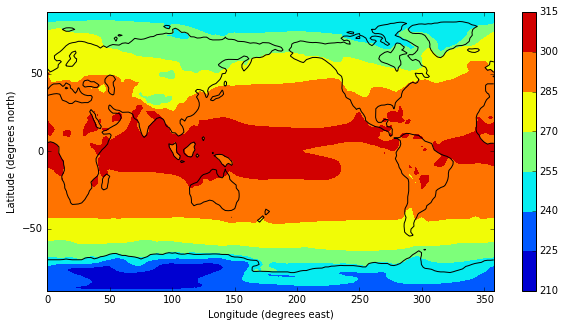

In [9]:
#  Use this function to make a quick map of the annual average surface temperature:
map_this('TS')

### Computing a global average

In [10]:
#  The lat/lon dimensions after taking the time average:
TS_annual = np.mean(control.variables['TS'][:], axis=0)
TS_annual.shape

(96, 144)

Define a little re-usable function to take the global average of any of these fields:

In [11]:
def global_mean(field_2d):
    '''This function takes a 2D array on a regular latitude-longitude grid 
       and returns the global area-weighted average'''
    zonal_mean = np.mean(field_2d, axis=1)
    return np.average(zonal_mean, weights=np.cos(np.deg2rad(lat)))

In [12]:
#  Again, a convenience function that takes just the name of the model output field
#  and returns its time and global average
def global_mean_this(fieldname, dataset=control):
    field = dataset.variables[fieldname][:]
    field_annual = np.mean(field, axis=0)
    return global_mean(field_annual)

Now compute the global average surface temperature in the simulation:

In [13]:
global_mean_this('TS')

287.62995292320477

## Cloud cover in the control simulation

The model simulates cloud amount in every grid box. The cloud field is thus 4-dimensional:

In [14]:
#  This field is not included in the small subset file
#  so this will only work if you are reading the full file from the online server
control.variables['CLOUD']

<type 'netCDF4._netCDF4.Variable'>
float32 CLOUD(time, lev, lat, lon)
    mdims: 1
    Sampling_Sequence: rad_lwsw
    units: fraction
    long_name: Cloud fraction
    cell_methods: time: mean time: mean
unlimited dimensions: time
current shape = (12, 26, 96, 144)
filling off

To simplify things we can just look at the **total cloud cover**, integrated from the surface to the top of the atmosphere:

In [15]:
control.variables['CLDTOT']

<type 'netCDF4._netCDF4.Variable'>
float32 CLDTOT(time, lat, lon)
    Sampling_Sequence: rad_lwsw
    units: fraction
    long_name: Vertically-integrated total cloud
    cell_methods: time: mean time: mean
unlimited dimensions: time
current shape = (12, 96, 144)
filling off

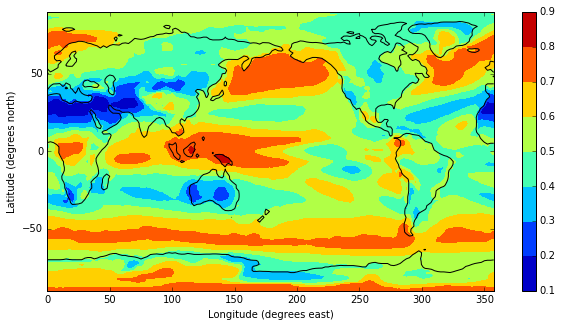

In [16]:
map_this('CLDTOT')

Which parts of Earth are cloudy and which are not? (at least in this simulation)

## Exercise 1: Make three maps: ASR, OLR, and the net radiation ASR-OLR (all annual averages)

What interesting features do you see on these maps?

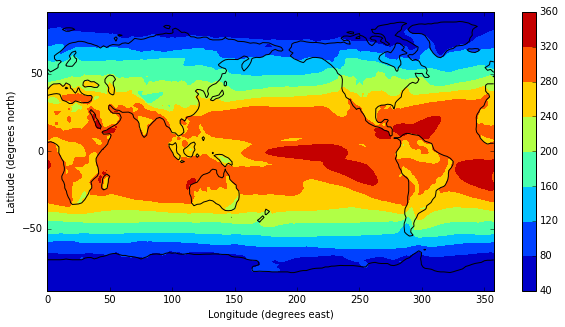

In [17]:
#  To get you started, here is the ASR
map_this('FSNT')

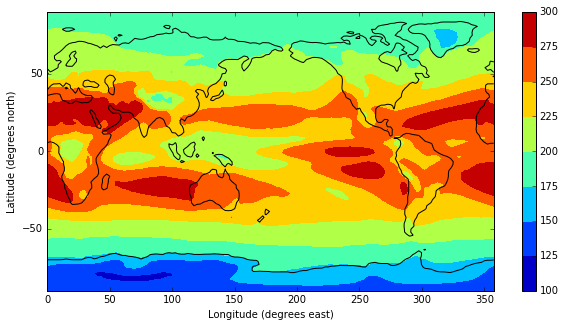

In [18]:
map_this('FLNT')

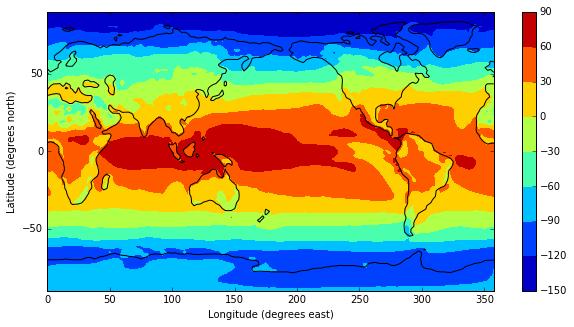

In [19]:
net_radiation = np.mean(control.variables['FSNT'][:] - control.variables['FLNT'][:], axis=0)
make_map(net_radiation)

## Exercise 2: Calculate the global average net radiation. 

Is it close to zero? What does that mean?

In [20]:
global_mean(net_radiation)

-0.08109020355954985

## Exercise 3: Make maps of the clear-sky ASR and clear-sky OLR

These diagnostics have been calculated by the GCM. Basically at every timestep, the GCM calculates the radiation twice: once with the clouds and once without the clouds.

## Exercise 4: Make a map of the Cloud Radiative Effect

Recall that we define $CRE$ as

$$ CRE = \left( ASR - ASR_{clear} \right) - \left( OLR - OLR_{clear} \right) $$

This quantity is **positive** where the clouds have a **net warming effect** on the climate.

## Exercise 5: in the global average, are the clouds warming or cooling the climate in the CESM control simulation?

#  Climate sensitivity in the CESM: the effects of doubling CO2

How much CO2 was in the atmosphere for the control simulation?

This information is available in the full output file (this won't work with the local subset file):

In [ ]:
#  The meta-data:
control.variables['co2vmr']

In [ ]:
# The data themselves, expressed in ppm:
control.variables['co2vmr'][:] * 1E6

Answer: the CO2 concentration is 284.7 ppm in the control simulation.

Now we want to see how the climate changes in the CESM when we double CO2 and run it out to equilibrium.

I have done this. Because we are using a slab ocean model, it reaches equilibrium after just a few decades.

Let's now open up the output file from the 2xCO2 scenario:

In [ ]:
##  To read data over the internet
# doubleCO2_filename = 'som_1850_2xCO2.cam.h0.clim.nc'
# doubleCO2 = nc.Dataset( datapath + 'som_1850_f19/' + doubleCO2_filename + endstr )

##  To read from a local copy of the file 
## (just a small subset of the total list of variables, to save disk space)
doubleCO2_filename = 'som_1850_2xCO2.cam.h0.clim_subset.nc'
doubleCO2 = nc.Dataset( doubleCO2_filename )

This file has all the same fields as `control`, but they reflect the new equilibrium climate after doubling CO2.

Let's verify the CO2 amount:

In [ ]:
doubleCO2.variables['co2vmr'][:] * 1E6

So the CO2 concentration is now 569.4 ppm.

## Exercise 6: Make a map of the change in surface temperature due to the doubling of CO2

What interesting features do you see on this map? Does it warm more in some locations than others?

## Exercise 7: Calculate the Equilibrium Climate Sensitivity for the CESM

Remember, this is just the global average of the temperature differences you plotted in Exercise 6

## Exercise 8: Compute the global average CRE in the 2xCO2 simulation

Are the clouds warming or cooling the climate? 

How has CRE changed compared to the control climate? (i.e. is the net effect larger or smaller than it was before)

Can you infer whether the **cloud feedback** is positive or negative in the CESM?